In [1]:
using Percolation, PyPlot

# percolation

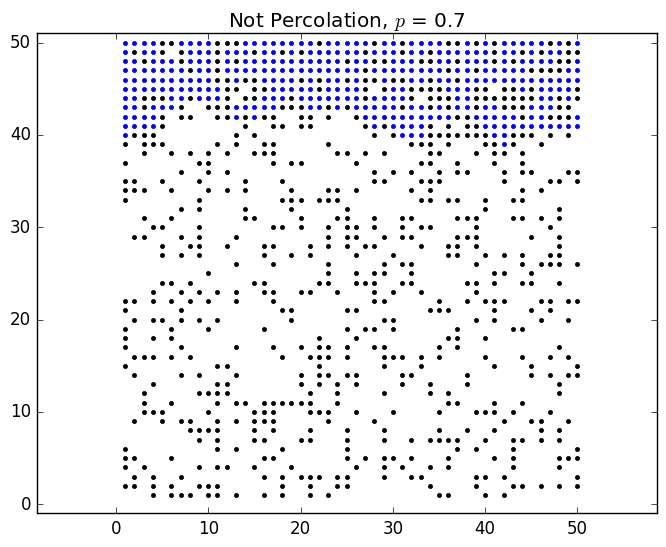

4-element Array{Int64,1}:
 -1
 51
 -1
 51

In [2]:
N = 50
p = 0.7
site = honeycomb(N, p)
percolation(site)
percolationplot(site)
axis([-1, N+1, -1, N+1])

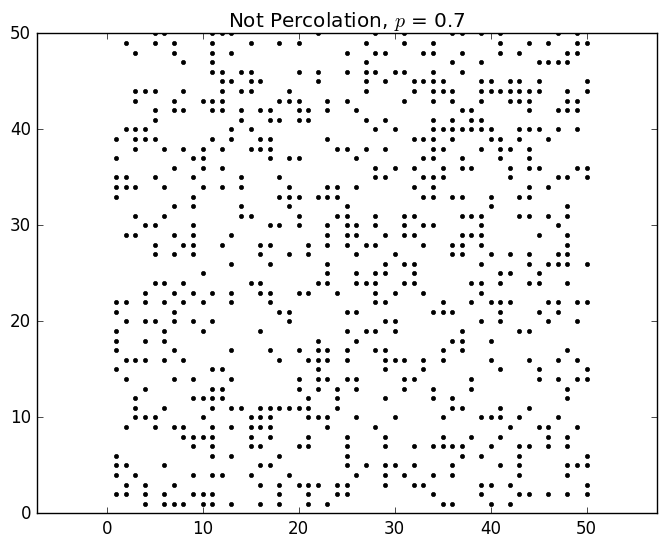

In [3]:
percolationplot(site, waterplot=false)

# cluster

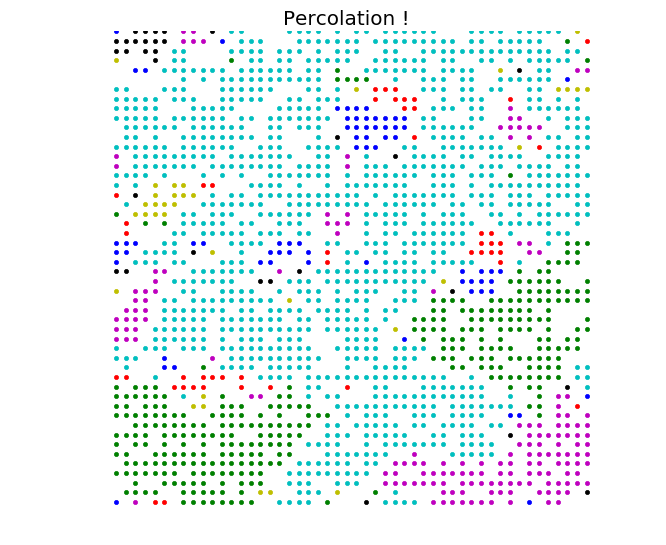

  0.008297 seconds (21.80 k allocations: 12.465 MB, 38.31% gc time)


In [8]:
site = honeycomb(50,0.7)
@time cluster(site)
clusterplot(site)

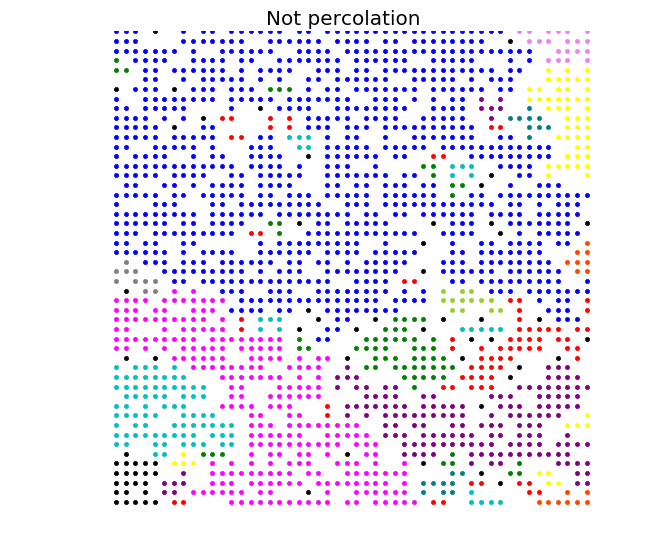

  0.006058 seconds (21.93 k allocations: 10.058 MB)


In [5]:
site = honeycomb(50,0.7)
@time cluster(site)
clusterplotsize(site)

# order parameter

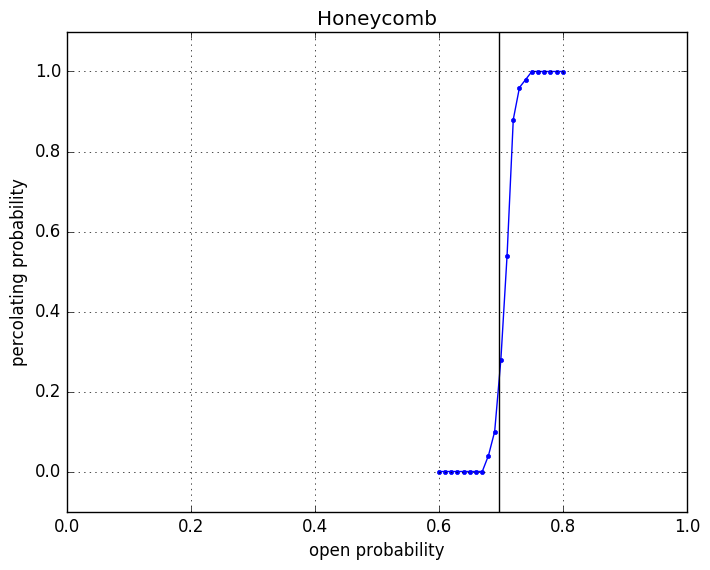

  6.838531 seconds (20.97 M allocations: 16.082 GB, 26.20% gc time)


In [6]:
plist = collect(0.6:0.01:0.8)
hit = zeros(Int, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        site = honeycomb(N, plist[i])
        hit[i] += percolation(site)
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.6962, 0.6962], [-0.5, 1.1], "k")
grid("on")
title("Honeycomb")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

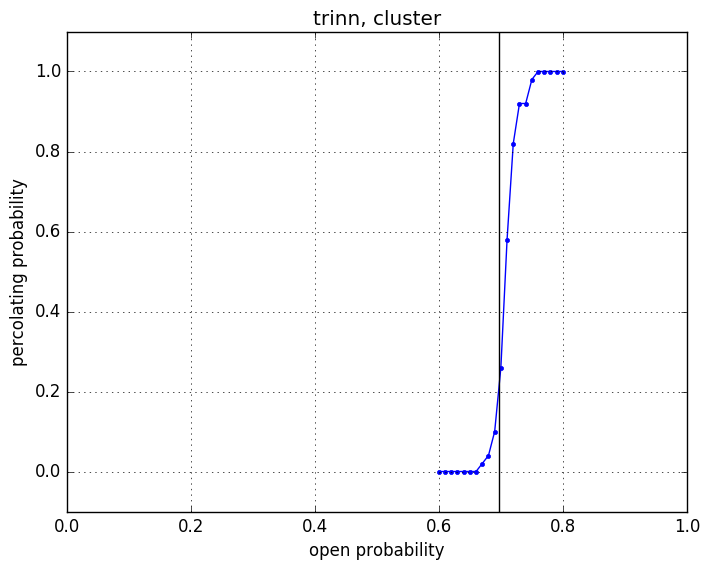

 38.739724 seconds (54.66 M allocations: 82.541 GB, 19.28% gc time)


In [10]:
# cluster
plist = collect(0.6:0.01:0.8)
hit = zeros(Int64, length(plist))
N = 75; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        site = honeycomb(N, plist[i])
        cluster(site)
        hit[i] += site.PercolationOrNot
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.6962, 0.6962], [-0.5, 1.1], "k")
grid("on")
title("trinn, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);